# Ernst Equation Derivation Taken From Exact Spacetimes by Griffiths Page 246 and Ernst's Original Papers
##  Geoff Cope
##  Univeristy of Utah
##  December 25, 2021 Christmas Morning!

https://www.cambridge.org/core/books/exact-spacetimes-in-einsteins-general-relativity/48896A8900897F53BDAA917456E884D6

https://journals.aps.org/pr/abstract/10.1103/PhysRev.167.1175

https://journals.aps.org/pr/abstract/10.1103/PhysRev.168.1415

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.41.1197

https://arxiv.org/abs/2012.13462

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols('t rho phi z dt drho dphi dz')

In [4]:
f = Function('f')(rho,z)
f

In [5]:
gamma = Function('gamma')(rho,z)
gamma

In [6]:
A = Function('A')(rho,z)
A

In [7]:
lineElement = expand(-f*(dt - A*dphi)**2 + f**-1 * ( exp(2*gamma)*(drho**2 + dz**2)+ rho**2 * dphi**2 ))
lineElement

In [8]:
variables = Matrix([t,rho,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [9]:
differentials = Matrix([dt,drho,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡   -f(ρ, z)          0            A(ρ, z)⋅f(ρ, z)            0     ⎤
⎢                                                                   ⎥
⎢                  2⋅γ(ρ, z)                                        ⎥
⎢                 ℯ                                                 ⎥
⎢       0         ──────────              0                   0     ⎥
⎢                  f(ρ, z)                                          ⎥
⎢                                                                   ⎥
⎢                                 2                                 ⎥
⎢                                ρ       2                          ⎥
⎢A(ρ, z)⋅f(ρ, z)      0       ─────── - A (ρ, z)⋅f(ρ, z)      0     ⎥
⎢                             f(ρ, z)                               ⎥
⎢                                                                   ⎥
⎢                                                          2⋅γ(ρ, z)⎥
⎢                                                         ℯ         ⎥
⎢       0           

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡   -f(ρ, z)          0            A(ρ, z)⋅f(ρ, z)            0     ⎤
⎢                                                                   ⎥
⎢                  2⋅γ(ρ, z)                                        ⎥
⎢                 ℯ                                                 ⎥
⎢       0         ──────────              0                   0     ⎥
⎢                  f(ρ, z)                                          ⎥
⎢                                                                   ⎥
⎢                                 2                                 ⎥
⎢                                ρ       2                          ⎥
⎢A(ρ, z)⋅f(ρ, z)      0       ─────── - A (ρ, z)⋅f(ρ, z)      0     ⎥
⎢                             f(ρ, z)                               ⎥
⎢                                                                   ⎥
⎢                                                          2⋅γ(ρ, z)⎥
⎢                                                         ℯ         ⎥
⎢       0           

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                                                             ∂                      2     
⎢⎢                                                             ──(f(ρ, z))   A(ρ, z)⋅f (ρ, z
⎢⎢                                                             ∂ρ                           
⎢⎢                    0                                        ─────────── + ───────────────
⎢⎢                                                              2⋅f(ρ, z)                   
⎢⎢                                                                                       2⋅ρ
⎢⎢                                                                                          
⎢⎢∂                      2       ∂                                                          
⎢⎢──(f(ρ, z))   A(ρ, z)⋅f (ρ, z)⋅──(A(ρ, z))                                                
⎢⎢∂ρ                             ∂ρ                                                         
⎢⎢─────────── + ────────────────────────────                          

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

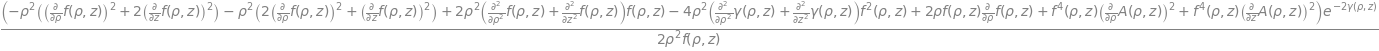

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [20]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [21]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

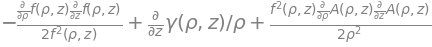

In [26]:
einstinSimplified = simplify(einst.tensor())
einstinSimplified[1,3]

In [27]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

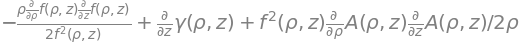

In [35]:
diff(gamma,z)-expand(solve( einstinSimplified[1,3],diff(gamma,z))[0])

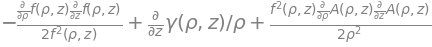

In [32]:
einstinSimplified[1,3]

In [40]:
diff(f,z)